In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# Installing PySpark
!pip install pyspark==3.2

#Start Spark Session and Configuration
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("rdd").getOrCreate()
sc = spark.sparkContext
sqlContext=SQLContext(spark)

/kaggle/input/leicestershirecrimedatas/2021-05-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2022-10-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2021-01-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2021-08-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2020-10-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2020-04-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2022-02-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2023-03-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2020-09-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2021-09-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2022-07-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2021-02-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2020-06-leicestershire-street.csv
/kaggle/input/leicestershirecrimedatas/2020-08-leic

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/22 08:24:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
# import python sql libraries and other functions 
from io import StringIO
from collections import namedtuple
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *

import csv
# import python library for plotting data
import matplotlib.pyplot as plt
#To import gmplot
import pandas as pd
import numpy as np

In [5]:
#create a RDD using the leicestershire street crime file
spRDD=sc.textFile('/kaggle/input/leicestershirecrimedatas/*leicestershire-street.csv')

In [6]:
#spRDD
spRDD.first()

'Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context'

### Creating "Leicestershire Street Crime" Dataframe

In [7]:
#creating a dataframe directly from the leicestershire street crime csv file.

LeicesterCrime = spark.read.option("header", "true").option("delimeter",",")\
.option("inferSchema", "true").csv("/kaggle/input/leicestershirecrimedatas/*leicestershire-street.csv")

In [8]:
LeicesterCrime

DataFrame[Crime ID: string, Month: string, Reported by: string, Falls within: string, Longitude: double, Latitude: double, Location: string, LSOA code: string, LSOA name: string, Crime type: string, Last outcome category: string, Context: string]

In [9]:

LeicesterCrime.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Last outcome category: string (nullable = true)
 |-- Context: string (nullable = true)



In [10]:
#LeicesterCrime.take(2)
#LeicesterCrime.show()
#LeicesterCrime.select('crime type').show()
LeicesterCrime.count()


314370

## Registering the Dataframe as a Table

In [11]:
sqlContext.registerDataFrameAsTable(LeicesterCrime,"tbLeicesterCrime")

In [12]:
sqlContext.sql("select * from tbLeicesterCrime").take(2)

[Row(Crime ID='f452c4f173253a9047a32f7e065820df600b01e8fa13c871121683cbd9fbad7a', Month='2022-05', Reported by='Leicestershire Police', Falls within='Leicestershire Police', Longitude=-1.214768, Latitude=52.622431, Location='On or near Queens Drive', LSOA code='E01025631', LSOA name='Blaby 002A', Crime type='Burglary', Last outcome category='Status update unavailable', Context=None),
 Row(Crime ID='7e8c156f99e28cf26f8ae9c05c4def8c102481e3fc3d88f8e7a6e6833fded1e7', Month='2022-05', Reported by='Leicestershire Police', Falls within='Leicestershire Police', Longitude=-1.214176, Latitude=52.621663, Location='On or near Lowland Avenue', LSOA code='E01025631', LSOA name='Blaby 002A', Crime type='Public order', Last outcome category='Investigation complete; no suspect identified', Context=None)]

In [13]:
# tidy up the column names

LeicesterCrime = LeicesterCrime.withColumnRenamed('Crime ID', 'Crime_ID')
LeicesterCrime = LeicesterCrime.withColumnRenamed('Reported by', 'Reported_by')
LeicesterCrime = LeicesterCrime.withColumnRenamed('Falls within', 'Falls_within')
LeicesterCrime = LeicesterCrime.withColumnRenamed('LSOA code', 'LSOA_code')
LeicesterCrime = LeicesterCrime.withColumnRenamed('LSOA name', 'LSOA_name')
LeicesterCrime = LeicesterCrime.withColumnRenamed('Crime type', 'Crime_type')
LeicesterCrime = LeicesterCrime.withColumnRenamed('Last outcome category', 'Last_outcome_category')

In [14]:
#LeicesterCrime.printSchema()
LeicesterCrime.take(2)

[Row(Crime_ID='f452c4f173253a9047a32f7e065820df600b01e8fa13c871121683cbd9fbad7a', Month='2022-05', Reported_by='Leicestershire Police', Falls_within='Leicestershire Police', Longitude=-1.214768, Latitude=52.622431, Location='On or near Queens Drive', LSOA_code='E01025631', LSOA_name='Blaby 002A', Crime_type='Burglary', Last_outcome_category='Status update unavailable', Context=None),
 Row(Crime_ID='7e8c156f99e28cf26f8ae9c05c4def8c102481e3fc3d88f8e7a6e6833fded1e7', Month='2022-05', Reported_by='Leicestershire Police', Falls_within='Leicestershire Police', Longitude=-1.214176, Latitude=52.621663, Location='On or near Lowland Avenue', LSOA_code='E01025631', LSOA_name='Blaby 002A', Crime_type='Public order', Last_outcome_category='Investigation complete; no suspect identified', Context=None)]

In [15]:
#Get the counts for each month ordered in descending order
LeicesterCrime.groupby("Month").count().orderBy(desc("count")).show()

+-------+-----+
|  Month|count|
+-------+-----+
|2022-08|10373|
|2022-05|10332|
|2022-07|10056|
|2022-03|10019|
|2022-06| 9980|
|2022-11| 9816|
|2022-10| 9802|
|2023-03| 9591|
|2022-04| 9494|
|2022-09| 9492|
|2021-06| 9299|
|2021-10| 9055|
|2023-02| 8793|
|2020-08| 8777|
|2022-01| 8730|
|2021-11| 8718|
|2021-07| 8694|
|2023-01| 8676|
|2022-12| 8603|
|2020-09| 8577|
+-------+-----+
only showing top 20 rows



In [16]:
#Retrieve yearly amount of crimes sorted descendantly
LeicesterCrime.select(substring(LeicesterCrime.Month, 1,4).alias('Year'), "Month")\
.groupby("Year").count().orderBy(desc("count")).show()

+----+------+
|Year| count|
+----+------+
|2022|115179|
|2021| 99007|
|2020| 73124|
|2023| 27060|
+----+------+



In [17]:
#Retrieve monthly amount of crimes (excluded year 2021) sorted descendantly
LeicesterCrime.where((LeicesterCrime.Month !='2022-10')).\
select(substring(LeicesterCrime.Month, 6,7)\
                                                          \
       .alias('Month'), LeicesterCrime.Month.\
                                                          \
       alias('MonthWithYear')).groupby("Month").\
count().orderBy(desc("count")).show()

+-----+-----+
|Month|count|
+-----+-----+
|   03|27723|
|   08|27609|
|   06|27524|
|   07|27191|
|   05|26850|
|   09|26633|
|   11|26452|
|   04|25520|
|   01|24198|
|   12|23870|
|   02|23784|
|   10|17214|
+-----+-----+



In [18]:
#register temp tables 
LeicesterCrime.registerTempTable("tbl_LeicesterCrime")

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [19]:
sqlContext.sql("select * from tbl_LeicesterCrime").show(5)

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code| LSOA_name|          Crime_type|Last_outcome_category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|f452c4f173253a904...|2022-05|Leicestershire Po...|Leicestershire Po...|-1.214768|52.622431|On or near Queens...|E01025631|Blaby 002A|            Burglary| Status update una...|   null|
|7e8c156f99e28cf26...|2022-05|Leicestershire Po...|Leicestershire Po...|-1.214176|52.621663|On or near Lowlan...|E01025631|Blaby 002A|        Public order| Investigation com...|   null|
|92068d66fa7c47414...|2022-05|Leicestershire Po...|Leicestershire Po..

In [20]:
#Retreive monthly crime amount and order by total in descending order
sqlContext.sql("select * from tbl_LeicesterCrime order by Month desc").show(5)

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code| LSOA_name|          Crime_type|Last_outcome_category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|8f1c66186e9444793...|2023-03|Leicestershire Po...|Leicestershire Po...|-1.211313|52.619873|On or near Pickar...|E01025631|Blaby 002A|         Other theft| Action to be take...|   null|
|817973b6623781447...|2023-03|Leicestershire Po...|Leicestershire Po...|-1.212224| 52.62343|On or near Willou...|E01025631|Blaby 002A|            Burglary|  Under investigation|   null|
|82da5fbc80ec568ca...|2023-03|Leicestershire Po...|Leicestershire Po..

In [21]:
# Create new dataframe with Month and Counts per Month

LeicesterCrimeB = LeicesterCrime.select(LeicesterCrime.Month)\
.groupby(LeicesterCrime.Month).count()

In [22]:
LeicesterCrimeB.printSchema()

root
 |-- Month: string (nullable = true)
 |-- count: long (nullable = false)



In [23]:
LeicesterCrimeB.orderBy(desc("Month")).show()

+-------+-----+
|  Month|count|
+-------+-----+
|2023-03| 9591|
|2023-02| 8793|
|2023-01| 8676|
|2022-12| 8603|
|2022-11| 9816|
|2022-10| 9802|
|2022-09| 9492|
|2022-08|10373|
|2022-07|10056|
|2022-06| 9980|
|2022-05|10332|
|2022-04| 9494|
|2022-03|10019|
|2022-02| 8482|
|2022-01| 8730|
|2021-12| 8185|
|2021-11| 8718|
|2021-10| 9055|
|2021-09| 8564|
|2021-08| 8459|
+-------+-----+
only showing top 20 rows



In [24]:
LeicesterCrimeB.registerTempTable("tbl_LeicesterCrimeB")

In [25]:
# Create new dataframe with month, total, and averages
monthlyCrimeAmount = sqlContext.\
sql("select substring(Month, 6, 2) as Month, \
SUM(count) as Total, avg(count) as \
Average from tbl_LeicesterCrimeB group by substring(Month, 6, 2)")

In [26]:
monthlyCrimeAmountnew = monthlyCrimeAmount.orderBy('Month')

In [27]:
monthlyCrimeAmountnew.show()

+-----+-----+-----------------+
|Month|Total|          Average|
+-----+-----+-----------------+
|   01|24198|           8066.0|
|   02|23784|           7928.0|
|   03|27723|           9241.0|
|   04|25520|8506.666666666666|
|   05|26850|           8950.0|
|   06|27524|9174.666666666666|
|   07|27191|9063.666666666666|
|   08|27609|           9203.0|
|   09|26633|8877.666666666666|
|   10|27016|9005.333333333334|
|   11|26452|8817.333333333334|
|   12|23870|7956.666666666667|
+-----+-----+-----------------+



In [28]:
# Register the monthlyCrimeAmount 
#DataFrame as a temp table and show the contents
monthlyCrimeAmountnew.registerTempTable("monthlyCrimeAmount")
sqlContext.sql("select * from monthlyCrimeAmount").show()

+-----+-----+-----------------+
|Month|Total|          Average|
+-----+-----+-----------------+
|   01|24198|           8066.0|
|   02|23784|           7928.0|
|   03|27723|           9241.0|
|   04|25520|8506.666666666666|
|   05|26850|           8950.0|
|   06|27524|9174.666666666666|
|   07|27191|9063.666666666666|
|   08|27609|           9203.0|
|   09|26633|8877.666666666666|
|   10|27016|9005.333333333334|
|   11|26452|8817.333333333334|
|   12|23870|7956.666666666667|
+-----+-----+-----------------+



In [29]:
# Prepare variables for visualisations

monthArray = sqlContext.sql("select Month from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
monthTotalArray = sqlContext.sql("select Total from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
monthAvgArray = sqlContext.sql("select Average from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()

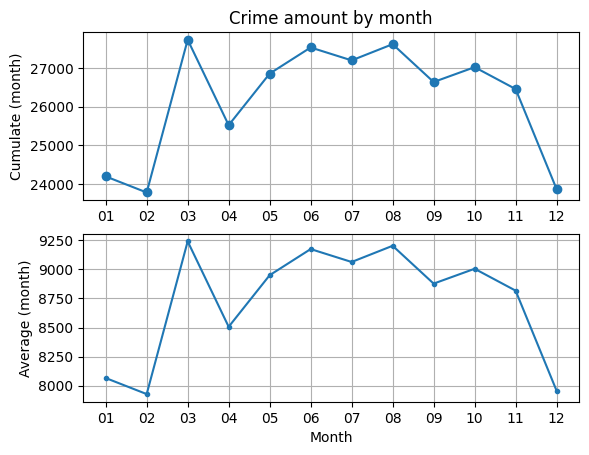

In [30]:
# Prepare variables for visualisations

# Plot visualisations

import matplotlib.pyplot as plt
import numpy as np

y = monthArray
t = monthTotalArray
a = monthAvgArray

plt.subplot(2, 1, 1)
plt.plot(y, t, 'o-')
plt.title('Crime amount by month')
plt.ylabel('Cumulate (month)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y, a, '.-')
plt.xlabel('Month')
plt.ylabel('Average (month)')
plt.grid(True)
plt.savefig("yearlyCrimeAmount.png")
plt.show()

# Create dataframe to retrieve information by year (total and average)

yearlyCrimeAmount = sqlContext.sql("select substring(Month, 0, 4) \
as Year, SUM(count) as Total, avg(count) as Average from \
tbl_LeicesterCrimeB group by substring(Month, 0, 4)")

In [31]:
yearlyCrimeAmount

DataFrame[Year: string, Total: bigint, Average: double]

In [32]:
# Register the yearly data in a temp table and show the contents

yearlyCrimeAmount.registerTempTable("yearlyCrimeAmount")
sqlContext.sql("select * from yearlyCrimeAmount").show()

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


+----+------+-----------------+
|Year| Total|          Average|
+----+------+-----------------+
|2020| 73124|8124.888888888889|
|2022|115179|          9598.25|
|2023| 27060|           9020.0|
|2021| 99007|8250.583333333334|
+----+------+-----------------+



In [33]:
# Prepare variables for visualisations

totalArray = sqlContext.sql("select Total from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
yearArray = sqlContext.sql("select Year from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
averageArray = sqlContext.sql("select Average from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()

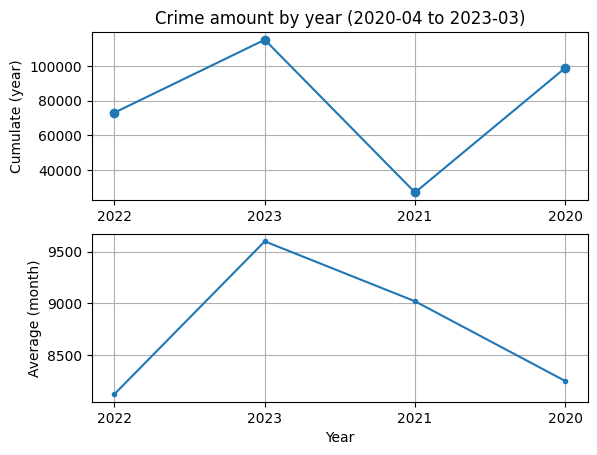

In [34]:
# Plot visualisations

import matplotlib.pyplot as plt
import numpy as np

y = yearArray
t = totalArray
a = averageArray

plt.subplot(2, 1, 1)
plt.plot(y, t, 'o-')
plt.title('Crime amount by year (2020-04 to 2023-03)')
plt.ylabel('Cumulate (year)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y, a, '.-')
plt.xlabel('Year')
plt.ylabel('Average (month)')
plt.grid(True)
plt.savefig("yearlyCrimeAmount.png")
plt.show()

In [35]:
sqlContext.sql("select Month, substring(Month, 0, 4) \
as Year, count(*) as Count from tbl_LeicesterCrime group by Month").show()

+-------+----+-----+
|  Month|Year|Count|
+-------+----+-----+
|2022-04|2022| 9494|
|2021-07|2021| 8694|
|2022-06|2022| 9980|
|2021-06|2021| 9299|
|2022-08|2022|10373|
|2021-11|2021| 8718|
|2023-03|2023| 9591|
|2022-07|2022|10056|
|2023-02|2023| 8793|
|2021-10|2021| 9055|
|2022-11|2022| 9816|
|2022-10|2022| 9802|
|2023-01|2023| 8676|
|2022-09|2022| 9492|
|2022-03|2022|10019|
|2022-05|2022|10332|
|2022-12|2022| 8603|
|2022-01|2022| 8730|
|2020-06|2020| 8245|
|2020-12|2020| 7082|
+-------+----+-----+
only showing top 20 rows



In [36]:
LeicesterCrime.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_by: string (nullable = true)
 |-- Falls_within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_code: string (nullable = true)
 |-- LSOA_name: string (nullable = true)
 |-- Crime_type: string (nullable = true)
 |-- Last_outcome_category: string (nullable = true)
 |-- Context: string (nullable = true)



In [37]:
# Create a Temp Table

LeicesterCrime.registerTempTable("tbl_LeicesterCrimeTypes")

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [38]:
# Explore Crime Types per year/month

CrimeTypes = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count from tbl_LeicesterCrimeTypes group by Month, Crime_type")

In [39]:
CrimeTypes.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2022-03|2022|  887|
|       Vehicle crime|2023-02|2023|  434|
|Anti-social behav...|2021-10|2021|  786|
|         Shoplifting|2022-11|2022|  417|
|         Shoplifting|2023-03|2023|  507|
|       Vehicle crime|2023-03|2023|  540|
|Possession of wea...|2022-05|2022|   95|
|Criminal damage a...|2023-01|2023|  797|
|Criminal damage a...|2022-07|2022|  964|
|               Drugs|2022-10|2022|  236|
|       Bicycle theft|2021-11|2021|  181|
|               Drugs|2021-07|2021|  256|
|Possession of wea...|2022-10|2022|   81|
|Violence and sexu...|2021-07|2021| 3334|
|             Robbery|2021-07|2021|   63|
|        Public order|2023-03|2023| 1123|
|Possession of wea...|2021-06|2021|   76|
|Criminal damage a...|2022-08|2022| 1033|
|Possession of wea...|2021-07|2021|   62|
|            Burglary|2022-07|2022|  496|
+--------------------+-------+----

In [40]:
# Explore Crime Types per year/month

CrimeTypesGeo = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year, Latitude, Longitude, \
count(*) as Count from tbl_LeicesterCrimeTypes group by Month, \
Crime_type, Latitude, Longitude")

In [41]:
CrimeTypesGeo.show()

+--------------------+-------+----+---------+---------+-----+
|          Crime_type|  Month|Year| Latitude|Longitude|Count|
+--------------------+-------+----+---------+---------+-----+
|Criminal damage a...|2022-05|2022|52.610118|-1.169118|    1|
|            Burglary|2022-05|2022|52.589462|-1.185038|    1|
|Violence and sexu...|2022-05|2022|52.651449|-1.203783|    3|
|Violence and sexu...|2022-05|2022|52.650251|-1.188845|    1|
|Anti-social behav...|2022-05|2022|52.759636|-1.298354|    1|
|         Other theft|2022-05|2022|52.738178|-1.101175|    1|
|       Vehicle crime|2022-05|2022| 52.69873|-1.074195|    1|
|Criminal damage a...|2022-05|2022|52.543909|-1.007175|    1|
|         Shoplifting|2022-05|2022|52.483376|-0.898345|    1|
|Criminal damage a...|2022-05|2022|52.567319|-1.347487|    1|
|Criminal damage a...|2022-05|2022|52.538033|-1.383351|    1|
|         Other theft|2022-05|2022|52.658693|-1.089796|    1|
|Anti-social behav...|2022-05|2022|52.666333|-1.151491|    1|
|Crimina

In [42]:
# Checking Leicestershire data for missing values

#LeicesterCrime.filter(LeicesterCrime.Month.isNull()).show()
LeicesterCrime.filter(LeicesterCrime.Location.isNull()).show()

+--------+-----+-----------+------------+---------+--------+--------+---------+---------+----------+---------------------+-------+
|Crime_ID|Month|Reported_by|Falls_within|Longitude|Latitude|Location|LSOA_code|LSOA_name|Crime_type|Last_outcome_category|Context|
+--------+-----+-----------+------------+---------+--------+--------+---------+---------+----------+---------------------+-------+
+--------+-----+-----------+------------+---------+--------+--------+---------+---------+----------+---------------------+-------+



In [43]:
LeicesterCrime.filter(LeicesterCrime.LSOA_name.isNull()).show(3)

+--------------------+-------+--------------------+--------------------+---------+--------+-----------+---------+---------+-------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude|Latitude|   Location|LSOA_code|LSOA_name|   Crime_type|Last_outcome_category|Context|
+--------------------+-------+--------------------+--------------------+---------+--------+-----------+---------+---------+-------------+---------------------+-------+
|610c477f7ade50c25...|2022-05|Leicestershire Po...|Leicestershire Po...|     null|    null|No Location|     null|     null|Bicycle theft| Court result unav...|   null|
|97c69da1e18467954...|2022-05|Leicestershire Po...|Leicestershire Po...|     null|    null|No Location|     null|     null|Bicycle theft| Investigation com...|   null|
|af0707b8b190532c3...|2022-05|Leicestershire Po...|Leicestershire Po...|     null|    null|No Location|     null|     null|Bicycle theft| Investigation com...| 

In [44]:
#LeicesterCrime.filter(LeicesterCrime.Crime_type.isNull()).show(3)
LeicesterCrime.filter(LeicesterCrime.Last_outcome_category.isNull()).show(3)

+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code| LSOA_name|          Crime_type|Last_outcome_category|Context|
+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|    null|2022-05|Leicestershire Po...|Leicestershire Po...|-1.225664|52.616057|On or near Yew Close|E01025632|Blaby 002B|Anti-social behav...|                 null|   null|
|    null|2022-05|Leicestershire Po...|Leicestershire Po...|-1.223572|52.618237|On or near Begoni...|E01025632|Blaby 002B|Anti-social behav...|                 null|   null|
|    null|2022-05|Leicestershire Po...|Leicestershire Po...|-1.201724|52.626506|On or near Superm...|E01025633|Blaby 002C|Anti-soc

In [45]:
i = 0 #reset counter.count()
# get the total records amount
total = LeicesterCrime.count()

print("Total Records = " + str(total))

#print the amount of columns
print("Total columns =" + str(len(LeicesterCrime.columns)))
print("---------------------------")

#Loop entire table and get the missing value number and missing rate of each column
while i < len(LeicesterCrime.columns): #Loop through all columns
    print(str(i+1) + "." + str(LeicesterCrime[i]))
    print(" Missing values =")
    print("--------------------------")
    mv = LeicesterCrime.select([count(when(LeicesterCrime[i].isNull(),\
                                                True))]).show()  
    #check for missing values
    #counter add 1
    i = i+1 

SyntaxError: invalid decimal literal (3411193199.py, line 20)

In [ ]:
#Get the counts for each month ordered in descending order
#LeicesterCrime.groupby("Crime_type").count().orderBy(desc("count")).show()
LeicesterCrime.groupby("Crime_type").count().orderBy(desc("count")).show()

In [ ]:
import pyspark.sql.functions as P
# Group crimes
LeicesterCrimebyCity= (LeicesterCrime.groupBy("LSOA_name").agg(P.count("*").alias("Crime_count"))
              .orderBy("Crime_count", ascending=False))

In [ ]:
LeicesterCrimebyCity.show()

In [ ]:
from pyspark.sql.functions import substring_index

# Splitting the LSOA_name column and keeping only the city name
LeicesterCrime_City = LeicesterCrimebyCity.withColumn('City', substring_index('LSOA_name', ' ', 1))



In [ ]:
# Grouping by the city name and summing the crime_count
LeicesterCrime_City= LeicesterCrime_City.groupBy('City').sum('Crime_count').orderBy('sum(Crime_count)', ascending=False)

In [ ]:
LeicesterCrime_City.show()

In [ ]:
# Renaming the sum(Crime_count) column to Crime_count
LeicesterCrime_City = LeicesterCrime_City.withColumnRenamed('sum(Crime_count)', 'Crime_count')

In [ ]:
# Display top 20 cities by crime count
LeicesterCrime_City.show(truncate=False, n=20)

In [56]:
import matplotlib.pyplot as plt
#convert PySpark Dataframe to Pandas
Crime_count =LeicesterCrime_City.toPandas()

#create a bar chart of total crime by type
axis = Crime_count.plot(kind='bar', x='City', y='Crime_count', color='blue')

#Set the chart title and axis labels
axis.set_title('All Crime in Leicestershire by City')
axis.set_xlabel('City')
axis.set_ylabel('Crime_count')

plt.show()

NameError: name 'LeicesterCrime_City' is not defined

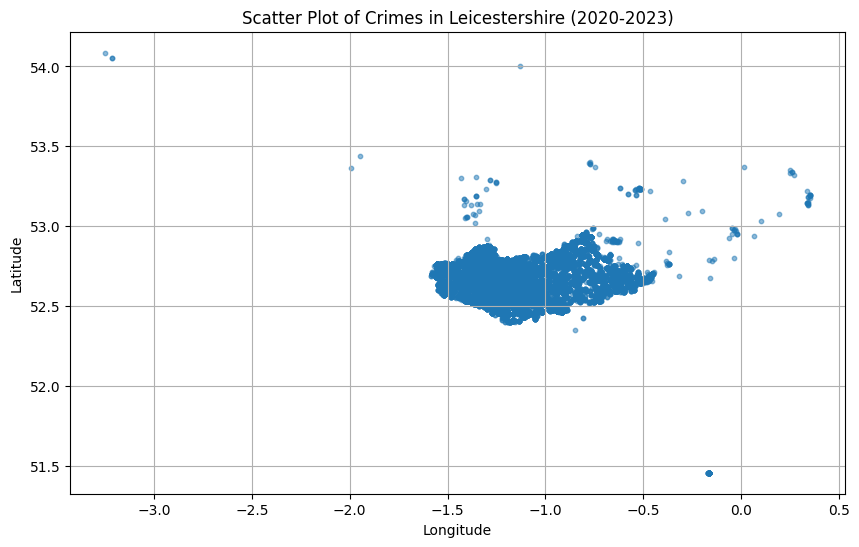

In [57]:
Longitude = LeicesterCrime.select("Longitude").rdd.flatMap(lambda x: x).collect()
Latitude = LeicesterCrime.select("Latitude").rdd.flatMap(lambda x: x).collect()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Longitude, Latitude, s=10, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Crimes in Leicestershire (2020-2023)")
plt.grid(True)
plt.show()


## Categorizing the Crime Type

In [ ]:
LeicesterCrime_cat=(LeicesterCrime.select('*').groupBy('Crime_type')
                   .agg(count("Crime_type").alias('All_crime'))
                   .orderBy('All_crime',ascendng=False))

LeicesterCrime_cat.show()

In [ ]:
LeicesterCrime_cat.agg({"All_crime":"sum"}).show()
#LeicesterCrime_cat.count()

In [ ]:
LeicesterCrime_cat=(LeicesterCrime.select('*')
.groupBy('Crime_type').agg(count('Crime_type').alias('All_Crime'))
.orderBy('All_Crime'))

In [ ]:
LeicesterCrime_cat.toPandas()

## VISUALIZING ALL CRIMES IN LEICESTERSHIRE CITIES BETWEEN 2020 - 2023


In [ ]:
import matplotlib.pyplot as plt
#convert PySpark Dataframe to Pandas
Crime_type =LeicesterCrime_cat.toPandas()

#create a bar chart of total crime by type
axis = Crime_type.plot(kind='bar', x='Crime_type', y='All_Crime', color='green')

#Set the chart title and axis labels
axis.set_title('All Crime in Leicester by Type')
axis.set_xlabel('Crime_type')
axis.set_ylabel('All Crime')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the Spark DataFrame LeicCrime
LeicCrime = LeicesterCrime.select(substring(LeicesterCrime.Month, 1, 4).alias('Year'), "Month", "Crime_type") \
    .groupby("Year", "Crime_type").count().orderBy(desc("count"))

# Convert LeicCrime to a pandas DataFrame
LeicCrime_Pyr = LeicCrime.toPandas()

# Get unique years and Crime types
years = LeicCrime_Pyr['Year'].unique()
Crime_types = LeicCrime_Pyr['Crime_type'].unique()

# Prepare data for the grouped bar chart
data = []
for year in years:
    year_data = LeicCrime_Pyr[LeicCrime_Pyr['Year'] == year]
    counts = year_data['count'].tolist()

    # Create a dictionary with Crime types as keys and counts as values
    Crime_type_dict = dict(zip(year_data['Crime_type'], counts))

    # Append the dictionary to the data list
    data.append(Crime_type_dict)

# Set up the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bar_width = 0.20
index = np.arange(len(Crime_types))

# Plotting the grouped bar chart
for i, year in enumerate(years):
    counts = [data[i].get(Crime_type, 0) for Crime_type in Crime_types]
    plt.bar(index + i * bar_width, counts, bar_width, label=year)

# Set labels and title
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Yearly Amount of Crimes by Crime Type')
plt.xticks(index + bar_width / 2, Crime_types)
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()

## PIE CHART OF LEICESTERSHIRE CRIME BY YEAR

In [ ]:

LiecCrime_Pie = LeicesterCrime.select(substring(LeicesterCrime.Month, 1, 4).alias('Year'), "Month") \
    .groupby("Year").count().orderBy(desc("count")).collect()

if LiecCrime_Pie:
    data = [(row['Year'], row['count']) for row in LiecCrime_Pie]

    # Extract the years and counts from the data
    years = [row[0] for row in data]
    counts = [row[1] for row in data]

    # Plotting the pie chart
    plt.pie(counts, labels=years, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Yearly Amount of Crimes in Leicestershire')
    plt.show()
else:
    print("No data available for the query.")

In [ ]:
#Get the counts for each month ordered in descending order
#LeicesterCrime.groupby("Crime_type").count().orderBy(desc("count")).show()
LeicesterCrime.groupby("Location").count().orderBy(desc("count")).show()

In [64]:
import pyspark.sql.functions as P
# Group crimes
LeicCrime_Loc= (LeicesterCrime.groupBy("Location").agg(P.count("*").alias("Location_count"))
              .orderBy("Location_count", ascending=False))


# Grouping by the city name and summing the crime_count
LeicCrime_Loc= LeicCrime_Loc.groupBy('Location').sum('Location_count').orderBy('sum(Location_count)', ascending=False)

In [65]:
LeicCrime_Loc

DataFrame[Location: string, sum(Location_count): bigint]

In [47]:
# Renaming the sum(Crime_count) column to Crime_count
LeicCrime_Loc = LeicCrime_Loc.withColumnRenamed('sum(Location_count)', 'Location_count')
#LeicCrime_Loc.count()
LeicCrime_Loc.show()

+--------------------+--------------+
|            Location|Location_count|
+--------------------+--------------+
|         On or near |         11636|
|         No Location|          6207|
|On or near Superm...|          6121|
|On or near Parkin...|          5322|
|On or near Petrol...|          4701|
|On or near Sports...|          3884|
|On or near Shoppi...|          2639|
|On or near Park/O...|          1995|
|On or near High S...|          1298|
|On or near Euston...|          1227|
|On or near Main S...|          1217|
|On or near Leices...|          1172|
|On or near Nightclub|          1150|
|On or near Church...|           998|
|On or near Granby...|           900|
|On or near Ashby ...|           897|
|On or near Swan S...|           839|
|On or near Market...|           785|
|On or near London...|           714|
|On or near Leices...|           666|
+--------------------+--------------+
only showing top 20 rows

